<a href="https://colab.research.google.com/github/itsGab/previsao_uti_em_covid/blob/main/notebooks/3_ANALISE_breve_analise_exploratoria_dados_limpos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'> Previsão de Admissão na UTI por COVID-19 </h1>
<h2 align='center'> Notebook De Análise Exploratória dos Dados Limpos</h2>

# IMPORTAÇÕES (data & libs)

In [37]:
# !pip install -U pandas-profiling

In [38]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

# importação dos dados
data_cleaned = 'https://github.com/itsGab/previsao_uti_em_covid/raw/main/dados/Dados_limpos'
info_col = 'https://github.com/itsGab/previsao_uti_em_covid/raw/main/dados/Colunas_por_tipo'

# FUNCÕES

In [39]:
def arrumando_listas(lista):
    ''' As listas foram salvas como string, fiz esse função para transformar em
    listas novamento. '''
    caracteres = "[],'"
    for caracter in caracteres:
        lista = lista.replace(caracter, '')
    return lista.split(' ')

# ABRINDO O CONJUNTO DE DADOS


In [40]:
# lendo os dados com pandas
df = pd.read_csv(data_cleaned, index_col=0)

# mostrando o formato e tamanho do dataframe
print(f'formato: {df.shape[0]} linhas, {df.shape[1]} colunas')
print(f'tamanho: {df.size}')

# abrindo lista de colunas por tipo
s_colunas = pd.read_csv(info_col, squeeze=True, index_col=0)
s_colunas = s_colunas.apply(arrumando_listas)

# mostrando o cabeçalho do dataframe
df.head()

formato: 296 linhas, 60 colunas
tamanho: 17760


,ICU,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE_GROUPING_1,DISEASE_GROUPING_2,DISEASE_GROUPING_3,DISEASE_GROUPING_4,DISEASE_GROUPING_5,DISEASE_GROUPING_6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MAX,BE_VENOUS_MAX,BIC_ARTERIAL_MAX,BIC_VENOUS_MAX,BILLIRUBIN_MAX,BLAST_MAX,CALCIUM_MAX,CREATININ_MAX,FFA_MAX,GGT_MAX,GLUCOSE_MAX,HEMOGLOBIN_MAX,INR_MAX,LACTATE_MAX,LINFOCITOS_MAX,NEUTROPHILES_MAX,P02_VENOUS_MAX,PC02_ARTERIAL_MAX,PC02_VENOUS_MAX,PCR_MAX,PH_ARTERIAL_MAX,PH_VENOUS_MAX,PLATELETS_MAX,POTASSIUM_MAX,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MAX,SODIUM_MAX,TGO_MAX,TGP_MAX,TTPA_MAX,UREA_MAX,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,5,0,0,0,0,0,1,1,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.109756,-0.932246,1.000000,-0.914938,-0.868747,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.237113,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.158537,-0.959849,1.000000,-0.908714,-0.412965,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.525773,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000
3,0,0,3,1,0,0,0,0,0,0,0,1,1,-0.263158,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.219512,-0.959849,-0.828421,-0.836100,-0.784714,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.175258,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0.605263,-1.0,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.304878,-0.959849,1.000000,-0.641079,-0.812725,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.443299,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536
6,0,1,6,1,0,0,0,0,0,0,0,1,1,0.605263,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.944798,-0.742004,-0.958528,-0.891993,-0.475610,-0.959849,1.000000,-0.858921,-0.947579,-0.704142,-0.77931,-0.754601,-0.750095,0.234043,0.363636,-0.636849,-0.962963,0.939394,0.345679,-0.257143,-0.995428,-0.986662,-0.846633,-0.951807,-0.978029,-0.010309,-0.500000,0.494505,0.959596,-0.452991,-0.610811,-0.537313,-0.636364,-0.043478,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [41]:
# from pandas_profiling import ProfileReport

# profile.to_notebook_iframe()
# profile.to_file('profile_dos_dados.html')

Nessa exibição inicial é possível ver o formato do dataframe, com o qual estamos trabalhando 

| Formato | Descrição |
|--|--|
| Linhas | 296 |
| Colunas | 60 |

In [42]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 384
Columns: 60 entries, ICU to TEMPERATURE_DIFF_REL
dtypes: float64(47), int64(13)
memory usage: 141.1 KB


In [43]:
df.isnull().sum().sum()

0

<h3 align='center'> Informações: </h3>

| Info | Descrição |
|--|--|
| Nº de colunas | 60 |
| Nº de linhas | 296 | 
| Data types| ["float64(47)", "int64(13)"] |
| Nº de pacientes | 296 | 
| Valores faltantes| 0 | 

# SEPARAÇÃO DE COLUNAS POR TIPO

As colunas podem ser categorizadas em 5 principais tipos, sendo elas: 

* Colunas informativas: são essa o identificador do paciente, a janela de tempo e se o paciente foi ou não admitido na UTI. 

* Colunas de demograficas: representam informações como sexo ou idade do paciente.

* Colunas de comorbidades: representam algum grupo de doença ou comorbidades que o paciente venha ou nao a ter.

* Colunas de sinais vitais: representam resultados de sinais vitais do paciente

* Colunas de exames laboratoriais: representam resultados de exames laboratorias feitos no paciente.



Fazendo a separação das colunas em lista por tipo e salvando em CSV para consulta

Separação de colunas por tipo do dados:

| nome da variável | descrição |
|---|---|
| informativas | uti |
| demograficos | faixa etária e sexo |
| comorbidades | grupos de doenças |
| sinais_vitais| sinais vitais |
| exames_laboratoriais | exames laboratoriais |


In [44]:
# Atualizando apenas colunas que permanecem no dataframe
for i, cols in s_colunas.items():
    s_colunas.loc[i] = [col for col in cols if col in df.columns]
s_colunas

informativas                                                        [ICU]
demograficas                         [AGE_ABOVE65, AGE_PERCENTIL, GENDER]
comorbidades            [DISEASE_GROUPING_1, DISEASE_GROUPING_2, DISEA...
sinais_vitais           [BLOODPRESSURE_DIASTOLIC_MIN, RESPIRATORY_RATE...
exames_laboratoriais    [ALBUMIN_MAX, BE_VENOUS_MAX, BIC_ARTERIAL_MAX,...
Name: Colunas_por_tipo, dtype: object

In [45]:
cols_categoricas = s_colunas['demograficas'] + s_colunas['comorbidades']
cols_continuas = s_colunas['sinais_vitais'] + s_colunas['exames_laboratoriais']

# CORRELAÇÃO

## Matrix de correlação

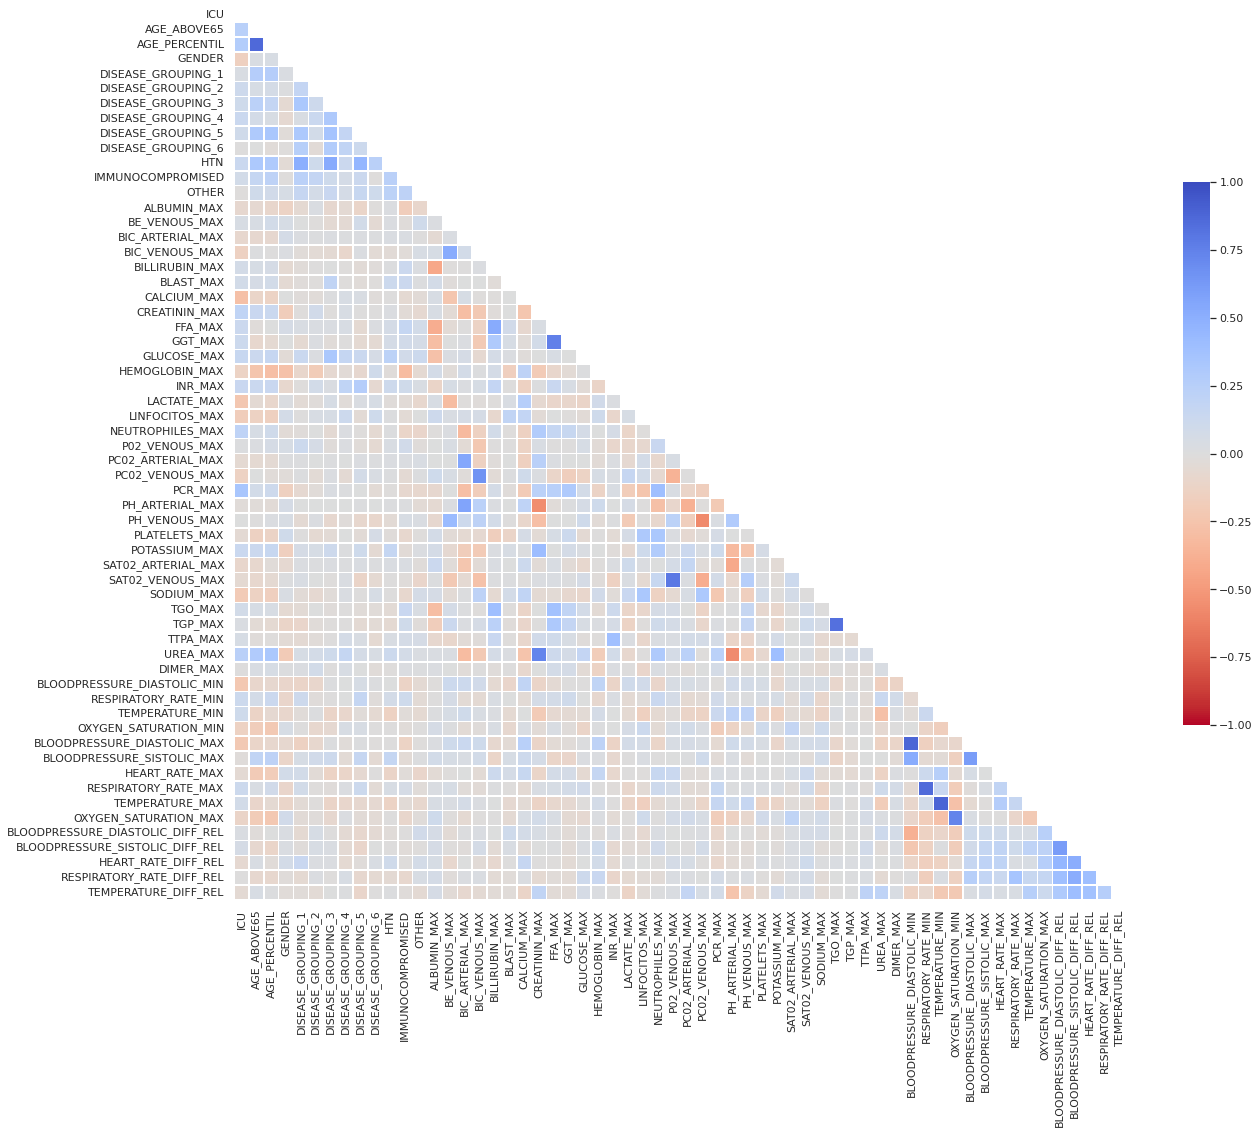

In [46]:
# Plotando MAPA DE CALOR da correlação entre colunas

# Computando a correlaçãoda matrix
matrix_corr = df.corr()

# Gerando a mascara para a parte superior do triangulo
mask = np.triu(np.ones_like(matrix_corr, dtype=bool))

# Settando paramentros e plotando o mapa de calor (heatmap)
# tamanho da figura
f, ax = plt.subplots(figsize=(20, 20))
# mapa de cores do mapa de calor
cmap = sns.color_palette("coolwarm_r", as_cmap=True)
# plot do mapa de calor
sns.heatmap(matrix_corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Correlação com ICU (UTI)

In [47]:
corr_icu = matrix_corr.sort_values('ICU',ascending=False).loc['PCR_MAX':,['ICU']]

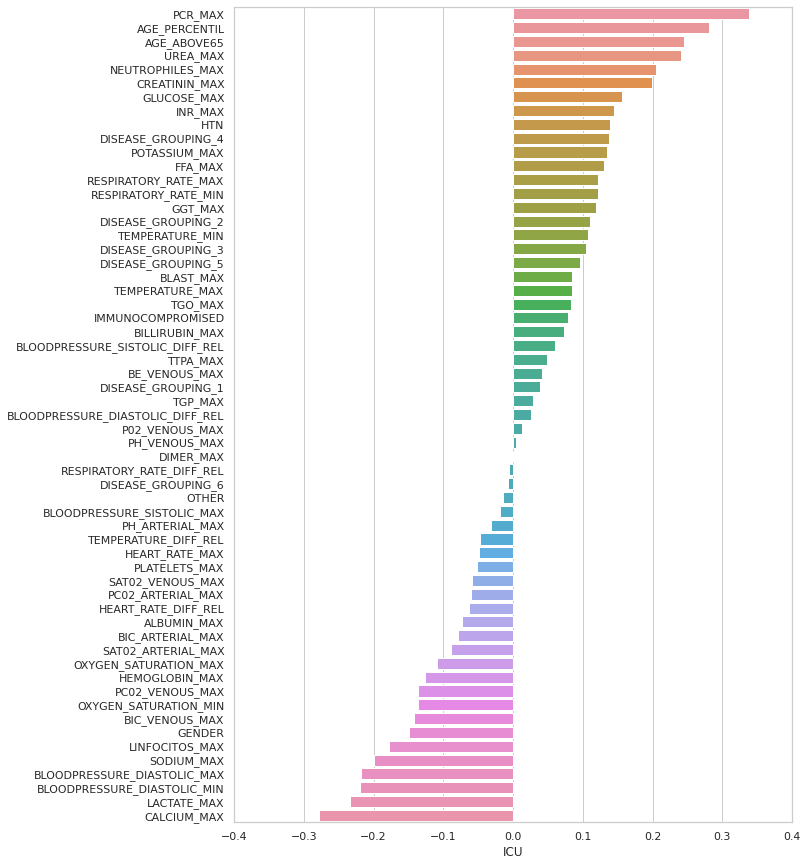

In [48]:
f, ax = plt.subplots(figsize=(10, 15))
g = sns.barplot(data=corr_icu, y=corr_icu.index, x=corr_icu['ICU'])
g.set(xlim=(-.4, .4))
plt.show()

Aqui podemos ver as colunas (ou ft.) que mais se correlacionam com a variável alvo (ICU) admissão na UTI. Quanto maior o valor absoluto, maior a correlação, e o sinal de positivo ou negativo indicam se a correlação e direto ou inversamente proporcional, respectivamente.

**hipótese**: Talves uma boa estrategia seja pegar as colunas (features) que tenham mais correlação com o ICU)

# ANALISE E GRAFICOS

In [49]:
map_gender = {0: 'Masculino', 1: 'Feminino'}
map_boolean = {1: 'Sim', 0: 'Não'}
map_age_percentil = {0:'10th', 1:'20th', 2:'30th', 3:'40th', 4:'50th',
                     5:'60th', 6:'70th', 7:'80th', 8:'90th', 9:'Above 90th'}

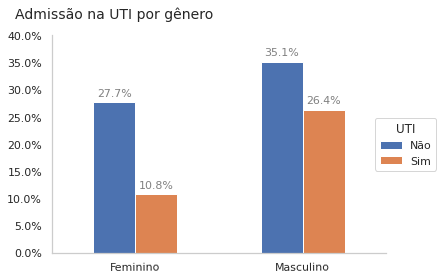

In [50]:
# definindo os dados
por_genero = pd.crosstab(df['GENDER'].map(map_gender), df['ICU'].map(map_boolean), normalize=True)

# plotando e configurando
ax = por_genero.plot.bar()
plt.grid(False)
plt.suptitle('Admissão na UTI por gênero', fontsize=14, ha='right')
plt.xticks(rotation=.45)
plt.xlabel('')
# plt.ylabel('Porcentagem (%)')
ax.legend(loc='center left', bbox_to_anchor=(0.95, 0.5), title='UTI')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.get_yaxis().set_visible(False)
plt.ylim(0,.4)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', color='grey', size=11)

plt.show()

Aqui podemos ver que os pacientes do sexo masculino tem maior representativadade na amostra e também em caso de internação na UTI.

In [51]:
def plota_bar_cross_uti(dados, coluna, map):

    # definindo os dados
    cross_uti = pd.crosstab(df[coluna].map(map), df['ICU'].map(map_boolean), normalize=True)

    # plotando e configurando
    ax = cross_uti.plot.bar()
    plt.grid(False)
    plt.suptitle(f'Admissão na UTI por {coluna}', fontsize=14, ha='right')
    plt.xticks(rotation=.45)
    plt.xlabel('')
    # plt.ylabel('Porcentagem (%)')
    ax.legend(loc='center left', bbox_to_anchor=(0.95, 0.5), title='UTI')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.get_yaxis().set_visible(False)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))


    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1%'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points', color='grey', size=11)

    plt.show()
    return cross_uti

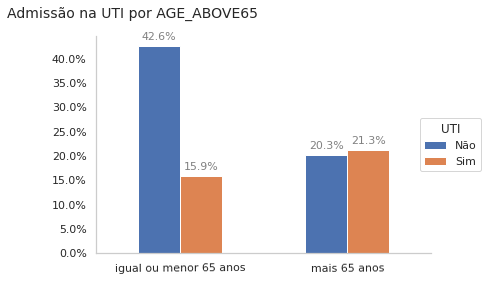

ICU,Não,Sim
AGE_ABOVE65,,
igual ou menor 65 anos,0.425676,0.158784
mais 65 anos,0.202703,0.212838


In [52]:
plota_bar_cross_uti(df, 'AGE_ABOVE65', {1: 'mais 65 anos', 0: 'igual ou menor 65 anos'})

Aqui já vemos que os pacientes com idade igual ou menor a 65 anos, tem uma chance muito menor de ir para a UTI, em relação a pacientes com mais de 65.